# **DIABETES DATASET: K-PROTOTYPES CLUSTERING (PATIENTS ONLY)**

<span style="font-size: 20px;">Created by *Oleksiy Danilin*</span>

<span style="font-size: 16px;">In this book, we run a k-prototypes model, based on the original dataset with mixed data types.

In [7]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Diabetes_binary.csv')

In [2]:
# Filter the DataFrame for diabetic patients
diabetic_patients = df[df['Diabetes_binary'] == 1]

In [3]:
# Save the filtered dataset to a new CSV file
diabetic_patients.to_csv('diabetic_patients_only.csv', index=False)

In [10]:
# Load the new patient-only dataset
patient_data = pd.read_csv('diabetic_patients_only.csv')
# Display the first 5 rows of the dataset
print(patient_data.head())

   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                1       1         1          1   30       1       0   
1                1       0         0          1   25       1       0   
2                1       1         1          1   28       0       0   
3                1       0         0          1   23       1       0   
4                1       1         0          1   27       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     1             0       1  ...              1   
1                     0             1       1  ...              1   
2                     0             0       0  ...              1   
3                     0             1       0  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        30        30         1    0    9          5

In [11]:
# Display basic information about the dataset
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35346 entries, 0 to 35345
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       35346 non-null  int64
 1   HighBP                35346 non-null  int64
 2   HighChol              35346 non-null  int64
 3   CholCheck             35346 non-null  int64
 4   BMI                   35346 non-null  int64
 5   Smoker                35346 non-null  int64
 6   Stroke                35346 non-null  int64
 7   HeartDiseaseorAttack  35346 non-null  int64
 8   PhysActivity          35346 non-null  int64
 9   Fruits                35346 non-null  int64
 10  Veggies               35346 non-null  int64
 11  HvyAlcoholConsump     35346 non-null  int64
 12  AnyHealthcare         35346 non-null  int64
 13  NoDocbcCost           35346 non-null  int64
 14  GenHlth               35346 non-null  int64
 15  MentHlth              35346 non-null  int64
 16  Phys

count    35346.000000
mean        31.944011
std          7.363401
min         13.000000
25%         27.000000
50%         31.000000
75%         35.000000
max         98.000000
Name: BMI, dtype: float64


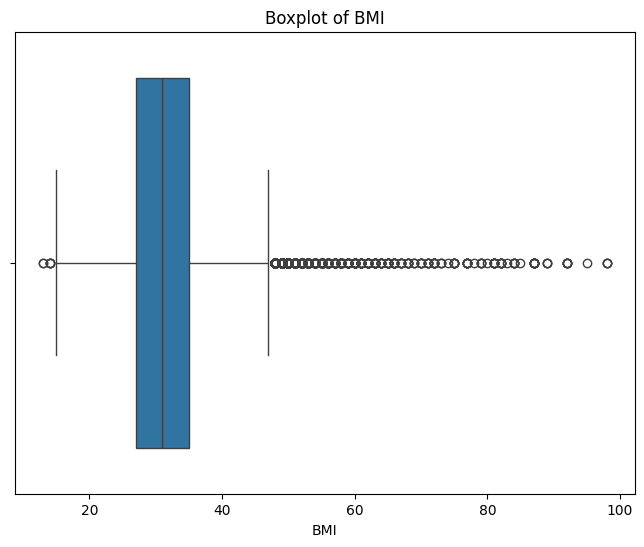

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get summary statistics for the 'BMI' column
numerical_summary = patient_data['BMI'].describe()
print(numerical_summary)

# Create a boxplot for the 'BMI' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=patient_data['BMI'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()

In [13]:
# Summarize key features (for example, Diabetes_binary, HighBP, BMI)
key_features = ['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity']
for feature in key_features:
    print(f"Summary of {feature}:\n{patient_data[feature].value_counts(normalize=True) * 100}\n")

Summary of Diabetes_binary:
Diabetes_binary
1    100.0
Name: proportion, dtype: float64

Summary of HighBP:
HighBP
1    75.267357
0    24.732643
Name: proportion, dtype: float64

Summary of HighChol:
HighChol
1    67.011826
0    32.988174
Name: proportion, dtype: float64

Summary of BMI:
BMI
27    7.800034
30    6.569343
28    6.368472
29    6.311888
32    5.997850
        ...   
95    0.002829
85    0.002829
80    0.002829
78    0.002829
74    0.002829
Name: proportion, Length: 77, dtype: float64

Summary of Smoker:
Smoker
1    51.821988
0    48.178012
Name: proportion, dtype: float64

Summary of PhysActivity:
PhysActivity
1    63.053811
0    36.946189
Name: proportion, dtype: float64



In [15]:
from kmodes.kprototypes import KPrototypes

# Assuming categorical columns are at specific indices, e.g., 1, 3, 5
categorical_indices = [14, 15, 16, 19, 20, 21]  # Replace these indices with the actual column indices

# Create an instance of KPrototypes
kproto = KPrototypes(n_clusters=3, init='Cao', random_state=42)

# Fit and predict clusters
clusters = kproto.fit_predict(patient_data, categorical=categorical_indices)

# Assign the cluster labels back to the dataframe
patient_data['Cluster'] = clusters

# Check the first few rows with the cluster labels
print(patient_data.head())

   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                1       1         1          1   30       1       0   
1                1       0         0          1   25       1       0   
2                1       1         1          1   28       0       0   
3                1       0         0          1   23       1       0   
4                1       1         0          1   27       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
0                     1             0       1  ...            0        5   
1                     0             1       1  ...            0        3   
2                     0             0       0  ...            0        4   
3                     0             1       0  ...            0        2   
4                     0             1       1  ...            0        1   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  Cluster  
0        30        30         1    0  

In [16]:
# Assuming patient_data is your DataFrame
# Drop the 'Cluster' column and calculate the correlation matrix
correlation_matrix = patient_data.drop(columns=['Cluster']).corr()

print(correlation_matrix)

                      Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary                   NaN       NaN       NaN        NaN   
HighBP                            NaN  1.000000  0.193184   0.030594   
HighChol                          NaN  0.193184  1.000000   0.019376   
CholCheck                         NaN  0.030594  0.019376   1.000000   
BMI                               NaN  0.117297  0.022752   0.007354   
Smoker                            NaN  0.020771  0.061110  -0.013836   
Stroke                            NaN  0.074988  0.054644   0.000335   
HeartDiseaseorAttack              NaN  0.118237  0.108267   0.001416   
PhysActivity                      NaN -0.061792 -0.037641   0.014930   
Fruits                            NaN -0.008662 -0.029895   0.020302   
Veggies                           NaN -0.028945 -0.017703   0.007444   
HvyAlcoholConsump                 NaN  0.000768  0.003755  -0.005277   
AnyHealthcare                     NaN  0.017119  0.006403   0.09

In [17]:
import pandas as pd

# Assuming patient_data is your DataFrame
# Drop the 'Cluster' column and calculate the correlation matrix
correlation_matrix = patient_data.drop(columns=['Cluster']).corr()

# Get the absolute values of the correlation coefficients
corr_abs = correlation_matrix.abs()

# Unstack the matrix to convert it to a Series
top_20_corr = corr_abs.unstack()

# Remove self-correlations (correlation of a variable with itself)
top_20_corr = top_20_corr[top_20_corr < 1]

# Exclude duplicates by keeping only pairs where the first variable is less than the second
top_20_corr = top_20_corr[top_20_corr.index.get_level_values(0) < top_20_corr.index.get_level_values(1)]

# Sort the values and get the top 20 correlation coefficients
top_20_corr = top_20_corr.sort_values(ascending=False).head(20)

print(top_20_corr)

GenHlth               PhysHlth                0.547667
DiffWalk              PhysHlth                0.456270
Education             Income                  0.443203
DiffWalk              GenHlth                 0.421492
MentHlth              PhysHlth                0.391259
GenHlth               MentHlth                0.327888
                      Income                  0.316476
DiffWalk              Income                  0.311051
                      PhysActivity            0.255306
                      MentHlth                0.250404
Income                PhysHlth                0.249606
                      Sex                     0.228164
Fruits                Veggies                 0.228061
GenHlth               PhysActivity            0.225494
Age                   BMI                     0.221206
PhysActivity          PhysHlth                0.220006
AnyHealthcare         NoDocbcCost             0.219221
GenHlth               HeartDiseaseorAttack    0.217530
Education 

In [18]:
# Check the number of patients in each cluster with percentage shares
cluster_counts = patient_data['Cluster'].value_counts()
total_patients = len(patient_data)
cluster_percentages = (cluster_counts / total_patients) * 100

# Combine counts and percentages
cluster_summary = pd.DataFrame({
    'Count': cluster_counts,
    'Percentage (%)': cluster_percentages
})

# Print the cluster summary
print("Cluster counts and percentage shares:\n", cluster_summary)

# Summary statistics for numerical columns grouped by cluster
numerical_summary = patient_data.groupby('Cluster').mean()
print("\nNumerical summary by cluster:\n", numerical_summary)

# Summary for categorical columns (mode for each categorical column per cluster)
categorical_summary = patient_data.groupby('Cluster').agg(lambda x: x.mode()[0])
print("\nCategorical summary by cluster:\n", categorical_summary)

Cluster counts and percentage shares:
          Count  Percentage (%)
Cluster                       
0        15950       45.125332
2        14789       41.840661
1         4607       13.034007

Numerical summary by cluster:
          Diabetes_binary    HighBP  HighChol  CholCheck        BMI    Smoker  \
Cluster                                                                        
0                    1.0  0.782884  0.684639   0.994483  33.604828  0.521630   
1                    1.0  0.829390  0.669850   0.991318  45.758628  0.487736   
2                    1.0  0.696193  0.654541   0.992359  25.849347  0.524038   

           Stroke  HeartDiseaseorAttack  PhysActivity    Fruits  ...  \
Cluster                                                          ...   
0        0.088339              0.221567      0.614420  0.569718  ...   
1        0.083568              0.209464      0.494682  0.533753  ...   
2        0.099669              0.228481      0.690243  0.618500  ...   

         Any

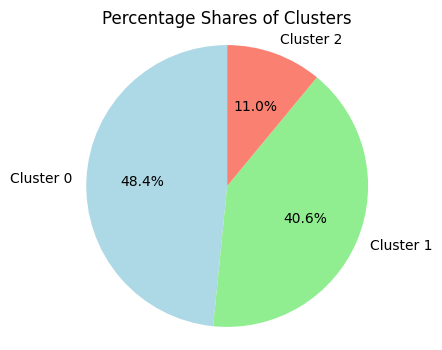

In [19]:
# Sample data for cluster counts and percentage shares
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
counts = [17111, 14352, 3883]
percentages = [48.41, 40.60, 10.99]

# Create a pie chart for percentage shares
plt.figure(figsize=(4, 4))
plt.pie(percentages, labels=clusters, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Percentage Shares of Clusters')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

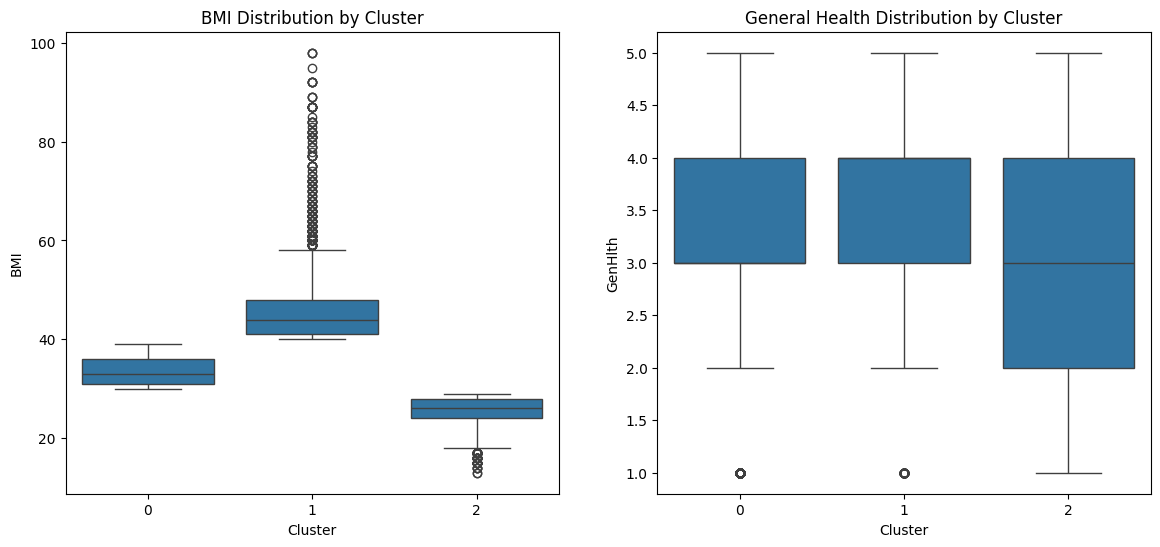

In [20]:
import seaborn as sns

# Assuming 'patient_data' has a column 'Cluster' and other numerical features
# Replace 'patient_data' with your actual DataFrame containing the clusters

# Create box plots for BMI and GenHlth
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Cluster', y='BMI', data=patient_data, ax=axes[0])
axes[0].set_title('BMI Distribution by Cluster')

sns.boxplot(x='Cluster', y='GenHlth', data=patient_data, ax=axes[1])
axes[1].set_title('General Health Distribution by Cluster')

plt.show()

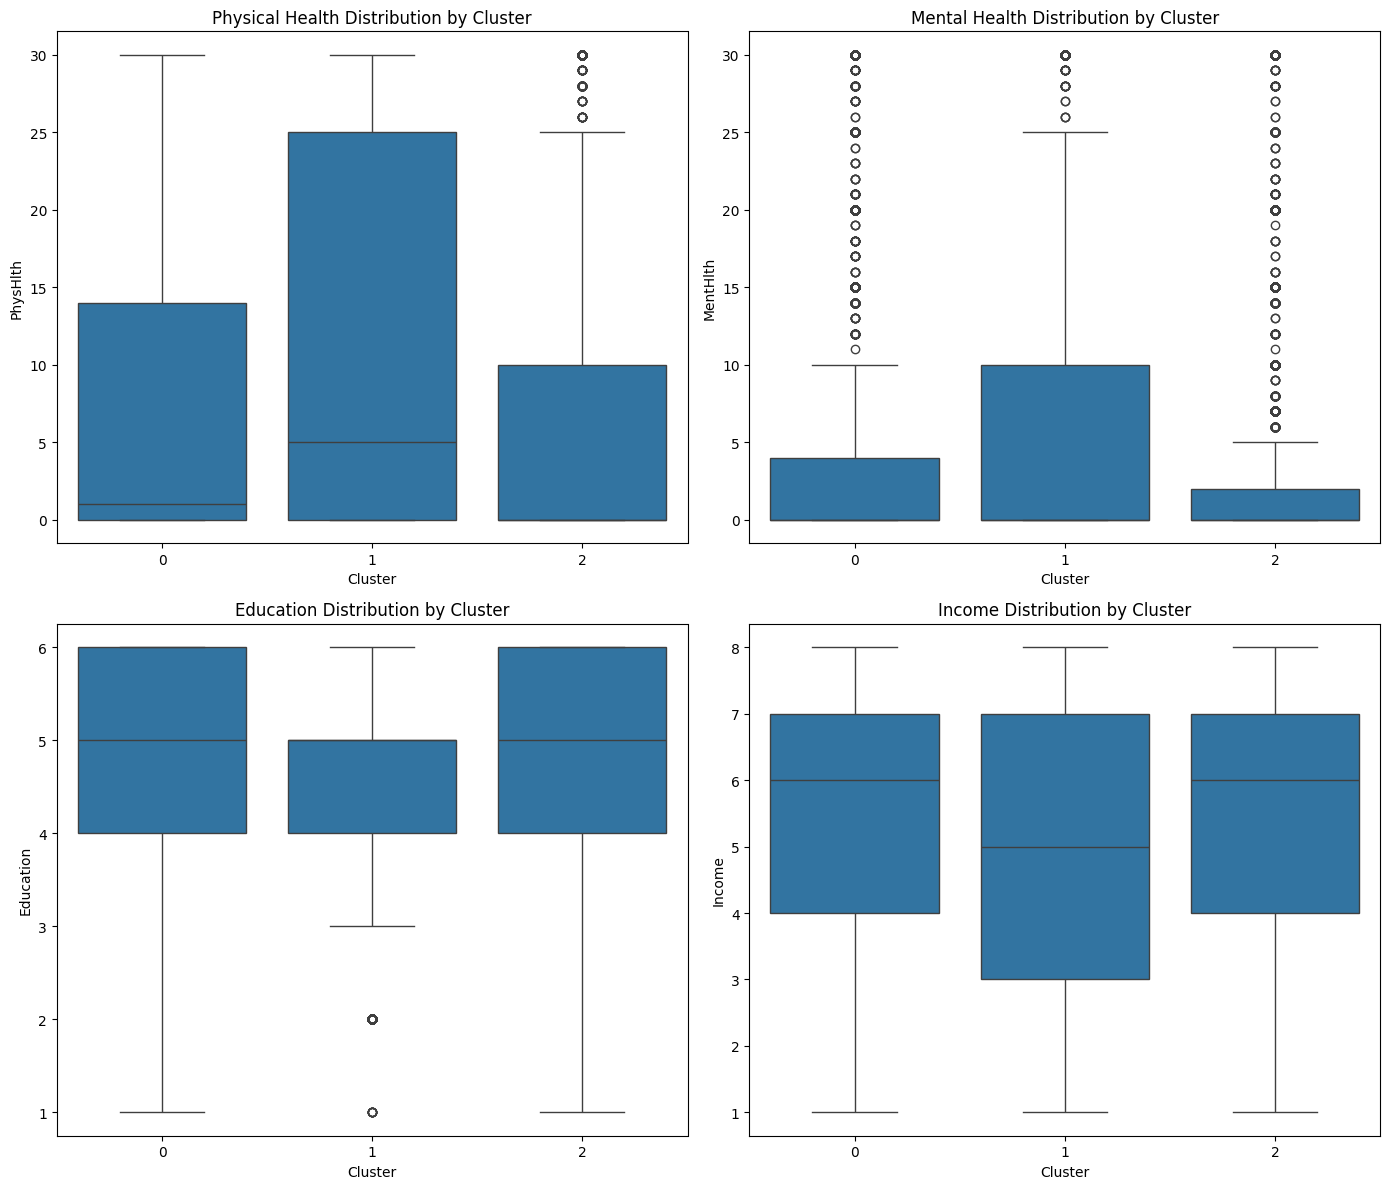

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'patient_data' has a column 'Cluster' and other numerical features

# Create subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Box plot for Physical Health by Cluster
sns.boxplot(x='Cluster', y='PhysHlth', data=patient_data, ax=axes[0, 0])
axes[0, 0].set_title('Physical Health Distribution by Cluster')

# Box plot for Mental Health by Cluster
sns.boxplot(x='Cluster', y='MentHlth', data=patient_data, ax=axes[0, 1])
axes[0, 1].set_title('Mental Health Distribution by Cluster')

# Box plot for Education by Cluster
sns.boxplot(x='Cluster', y='Education', data=patient_data, ax=axes[1, 0])
axes[1, 0].set_title('Education Distribution by Cluster')

# Box plot for Income by Cluster
sns.boxplot(x='Cluster', y='Income', data=patient_data, ax=axes[1, 1])
axes[1, 1].set_title('Income Distribution by Cluster')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

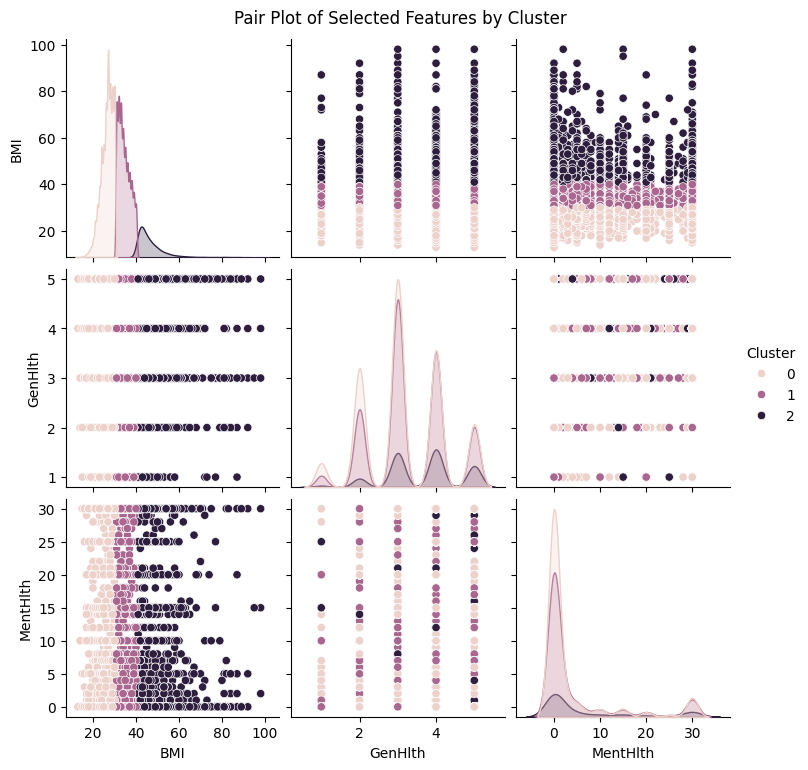

In [71]:
sns.pairplot(patient_data, hue='Cluster', vars=['BMI', 'GenHlth', 'MentHlth'])
plt.suptitle('Pair Plot of Selected Features by Cluster', y=1.02)
plt.show()

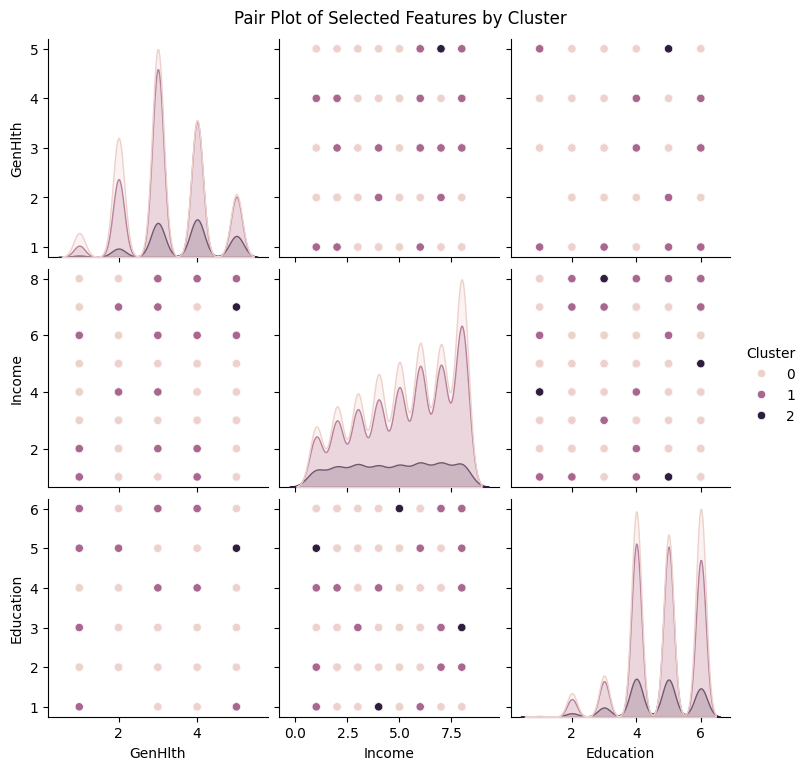

In [72]:
sns.pairplot(patient_data, hue='Cluster', vars=['GenHlth', 'Income', 'Education'])
plt.suptitle('Pair Plot of Selected Features by Cluster', y=1.02)
plt.show()